In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [10]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True, index_col='date')
df.rename({'page_views':'views'}, axis=1, inplace=True)

# Clean data
df = df[(df['views'] > df['views'].quantile(0.025)) & (df['views'] < df['views'].quantile(0.975))]


def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize(14,4))
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page_Views')
    ax.plot(df, color='red')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy(deep=True)
    df_bar['Year'] = df_bar.index.year
    df_bar['Month'] = df_bar.index.strftime("%B")
    df_bar = df_bar.groupby(['Year','Month'])['views'].mean().unstack('Month') # unstacks month from columns
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df_bar = monthly_df.reindex(columns=month_order)

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(10, 8))
    df_bar.plot(kind='bar', ax=ax)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Page Views')
    ax.legend(title='Months', loc='best')
    plt.tight_layout()




    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

    # yearly plot
    sns.boxplot(df_box, 
                x='year', 
                y='views',
                orient='vertical',
                flierprops={'marker':'+', 'markersize':3}, 
                hue='year', 
                palette=sns.color_palette()[:4],
                legend=None,
                ax=ax1)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    ax1.set_title('Year-wise Box Plot (Trend)')
    
    
    # monthly plot
    palette = sns.color_palette('husl', 12)
    palette = palette[4:] + palette[:4]
    sns.boxplot(df_box,
                x='month',
                y='views',
                order=month_order,
                flierprops={'marker':'+', 'markersize':3},
                hue='month',
                palette=palette,
                legend=None,
                ax=ax2)
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    ax2.set_title('Month-wise Box Plot (Seasonality)')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

             value
date              
2016-05-09    1201
2016-05-10    2329
2016-05-11    1716
2016-05-12   10539
2016-05-13    6933
...            ...
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-02  220144
2019-12-03  158549

[1304 rows x 1 columns]


## Line plot

In [208]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True, index_col='date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [209]:
df.rename({'value':'views'}, axis=1, inplace=True)

In [210]:
df = df[
    (df['views'] > df['views'].quantile(0.025)) 
    & (df['views'] < df['views'].quantile(0.975))
    ]

df

,views
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


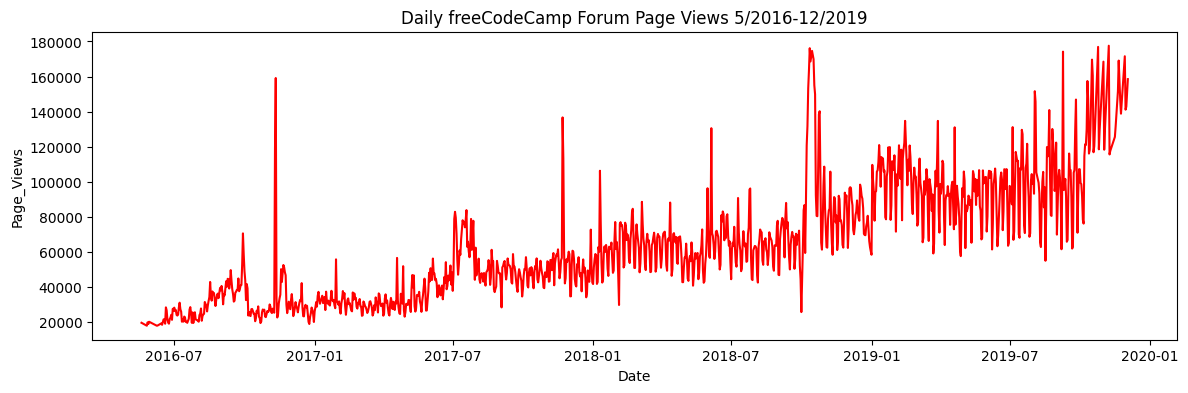

In [211]:
fig, ax = plt.subplots(figsize=(14,4))

ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page_Views')
ax.plot(clean_df, color='red')

In [212]:
plt.plot?

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie

## Bar Plot

In [213]:
print(df.index.year)
print('\n')
print(df.index.strftime("%B"))

Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       ...
       2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
      dtype='int32', name='date', length=1238)


Index(['May', 'May', 'May', 'May', 'May', 'June', 'June', 'June', 'June',
       'June',
       ...
       'November', 'November', 'November', 'November', 'November', 'November',
       'November', 'November', 'December', 'December'],
      dtype='object', name='date', length=1238)


In [214]:
df_bar = df.copy(deep=True)
df_bar

,views
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [215]:
df_bar['Year'] = df_bar.index.year
df_bar['Month'] = df_bar.index.strftime("%B")
df_bar

,views,Year,Month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May
...,...,...,...
2019-11-24,138875,2019,November
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November


In [216]:
df_bar = df_bar.groupby(['Year','Month'])['views'].mean().unstack(level=1) # unstacks month from columns
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_bar = df_bar.reindex(columns=month_order)
df_bar

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


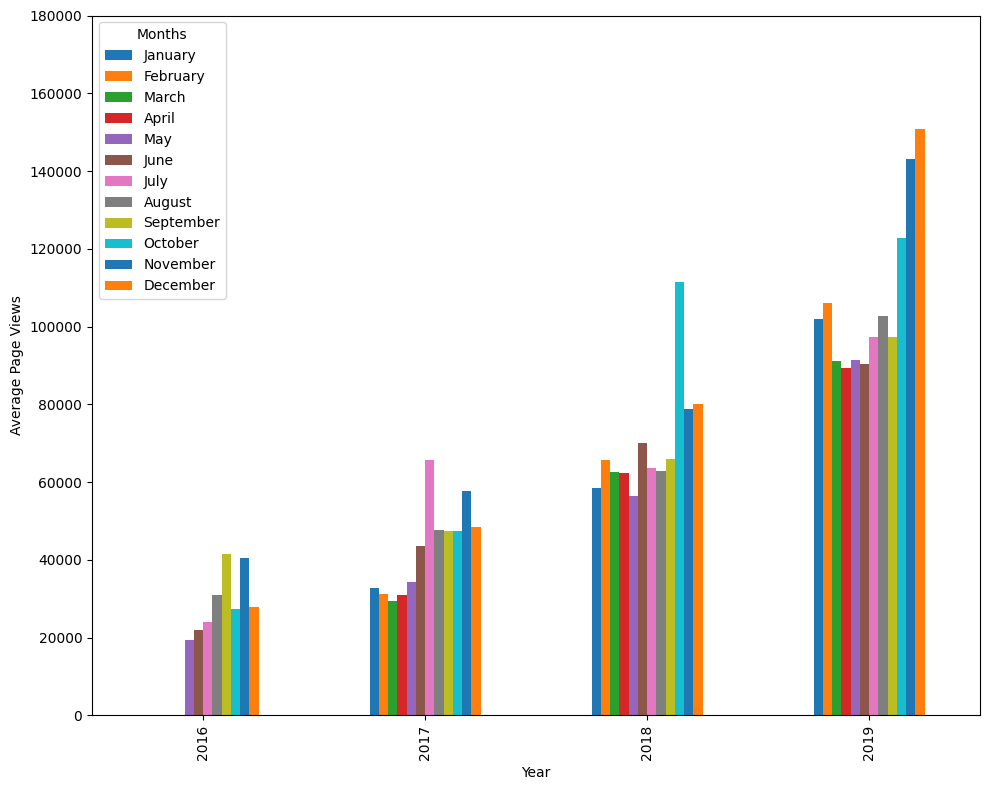

In [217]:
fig, ax = plt.subplots(figsize=(10, 8))

df_bar.plot(kind='bar', ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Average Page Views')
ax.set_yticks(np.arange(0, 2E5, 20000))
ax.legend(title='Months', loc='best')
plt.tight_layout()
# plt.show()

In [218]:
pd.DataFrame.plot?

Init signature: pd.DataFrame.plot(data: 'Series | DataFrame') -> 'None'
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot (DataFrame only)
    - 'hexbin' : hexbin plot (DataFrame only)
ax : matplotlib axes object, default None
    A

## Box Plot

In [235]:
df_box = clean_df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# df_box['month'] = pd.Categorical(
#     df_box['month'],
#     categories=month_order,
#     ordered=True)

In [236]:
df_box

,date,views,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

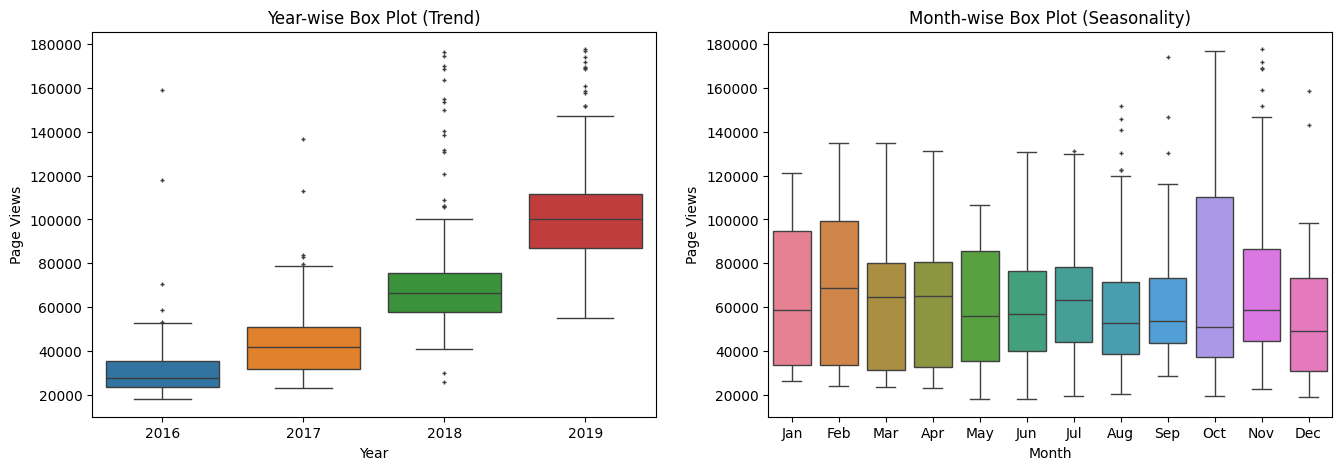

In [305]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

# yearly plot
sns.boxplot(df_box, 
            x='year', 
            y='views',
            orient='vertical',
            flierprops={'marker':'+', 'markersize':3}, 
            hue='year', 
            palette=sns.color_palette()[:4],
            legend=None,
            ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax1.set_title('Year-wise Box Plot (Trend)')


# monthly plot
palette = sns.color_palette('husl', 12)
palette = palette[4:] + palette[:4]
sns.boxplot(df_box,
            x='month',
            y='views',
            order=month_order,
            flierprops={'marker':'+', 'markersize':3},
            hue='month',
            palette=palette,
            legend=None,
            ax=ax2)
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
ax2.set_title('Month-wise Box Plot (Seasonality)')